In [1]:
#data loading
import pandas as pd
filename="/content/CPS1988.csv"
a=pd.read_csv(str(filename))

print(a)

       rownames    wage  education  experience ethnicity smsa     region  \
0             1  354.94          7          45      cauc  yes  northeast   
1             2  123.46         12           1      cauc  yes  northeast   
2             3  370.37          9           9      cauc  yes  northeast   
3             4  754.94         11          46      cauc  yes  northeast   
4             5  593.54         12          36      cauc  yes  northeast   
...         ...     ...        ...         ...       ...  ...        ...   
28150     28151  356.13         12          13      cauc   no       west   
28151     28152  308.64         12           8      cauc   no       west   
28152     28153  427.35         12          28      cauc   no       west   
28153     28154  834.02         17          30      cauc   no       west   
28154     28155  123.08         10          26      cauc   no       west   

      parttime  
0           no  
1          yes  
2           no  
3           no  
4 

In [2]:
print(a.head())

   rownames    wage  education  experience ethnicity smsa     region parttime
0         1  354.94          7          45      cauc  yes  northeast       no
1         2  123.46         12           1      cauc  yes  northeast      yes
2         3  370.37          9           9      cauc  yes  northeast       no
3         4  754.94         11          46      cauc  yes  northeast       no
4         5  593.54         12          36      cauc  yes  northeast       no


In [3]:
print(a.tail())

       rownames    wage  education  experience ethnicity smsa region parttime
28150     28151  356.13         12          13      cauc   no   west       no
28151     28152  308.64         12           8      cauc   no   west      yes
28152     28153  427.35         12          28      cauc   no   west       no
28153     28154  834.02         17          30      cauc   no   west       no
28154     28155  123.08         10          26      cauc   no   west      yes


In [4]:
##Checking for null values
a.isna().sum()

,0
rownames,0
wage,0
education,0
experience,0
ethnicity,0
smsa,0
region,0
parttime,0


In [5]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()


#transform string into int
transformColumns={4,5,6,7}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

       rownames    wage  education  experience  ethnicity  smsa  region  \
0             1  354.94          7          45          1     1       1   
1             2  123.46         12           1          1     1       1   
2             3  370.37          9           9          1     1       1   
3             4  754.94         11          46          1     1       1   
4             5  593.54         12          36          1     1       1   
...         ...     ...        ...         ...        ...   ...     ...   
28150     28151  356.13         12          13          1     0       3   
28151     28152  308.64         12           8          1     0       3   
28152     28153  427.35         12          28          1     0       3   
28153     28154  834.02         17          30          1     0       3   
28154     28155  123.08         10          26          1     0       3   

       parttime  
0             0  
1             1  
2             0  
3             0  
4        

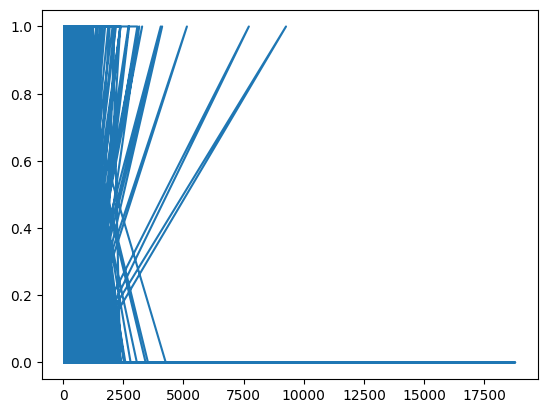

In [6]:
from matplotlib import pyplot as plt
target="parttime"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 28155 artists>

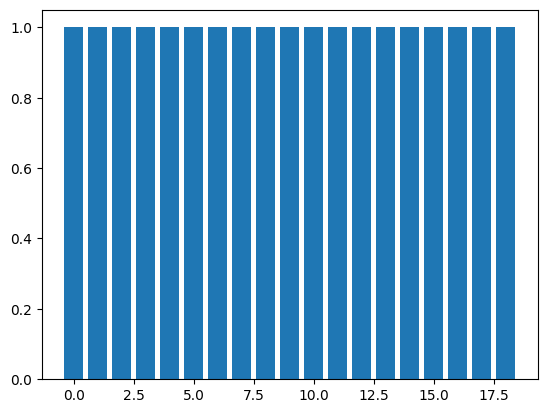

In [7]:
plt.bar(a[a.columns[2]],a[str(target)])

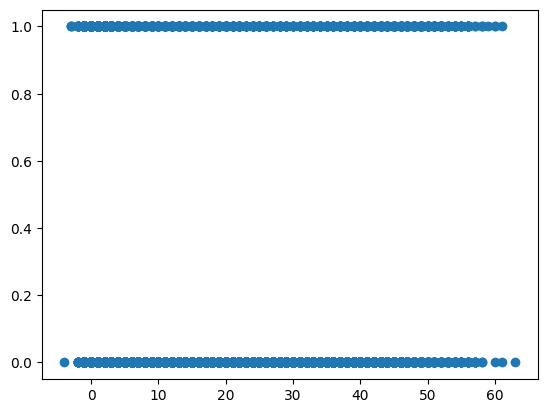

In [8]:
plt.scatter(a[a.columns[3]], a[str(target)])

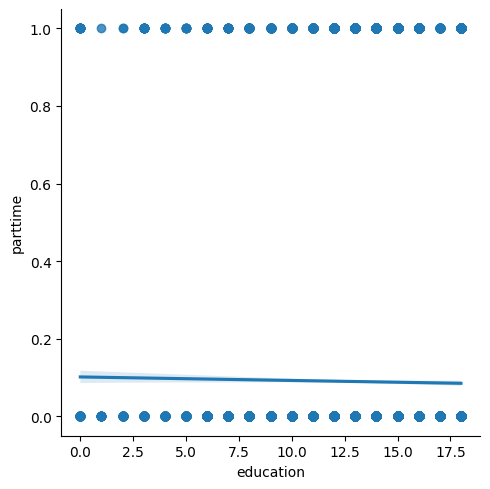

In [9]:
import seaborn as sns
#a["education"] = pd.to_numeric(a["education"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="education",y=str(target),data=a)

<Axes: xlabel='smsa', ylabel='parttime'>

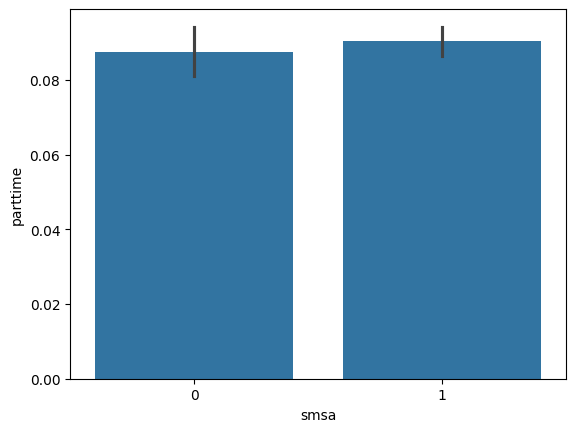

In [10]:
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='wage', ylabel='parttime'>

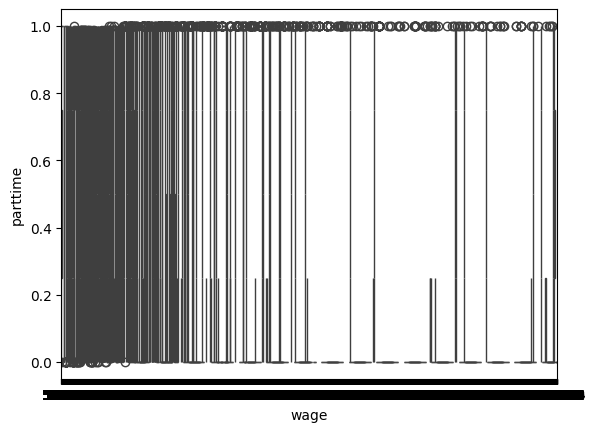

In [11]:
sns.boxplot(x=a.columns[1],y=str(target),data=a)

<ipython-input-12-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='parttime', ylabel='Density'>

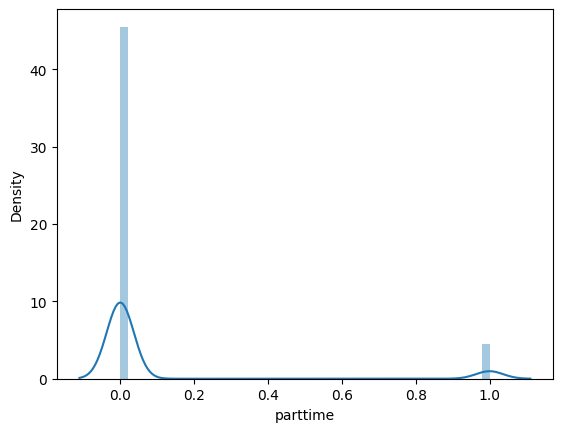

In [12]:
sns.distplot(a[str(target)])

<Axes: xlabel='wage', ylabel='Density'>

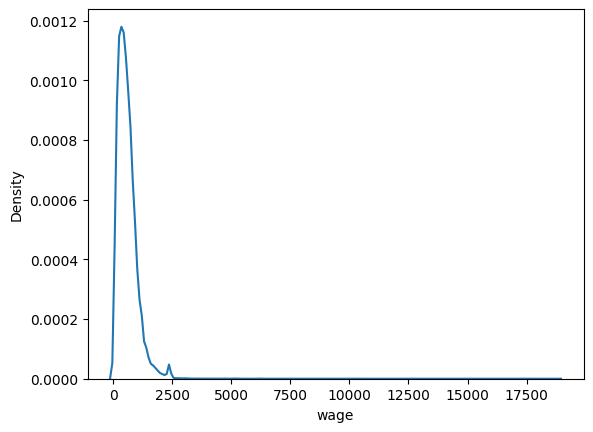

In [13]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='experience', ylabel='count'>

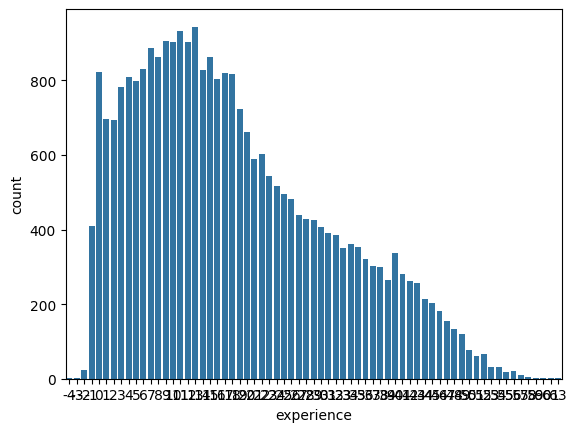

In [14]:
sns.countplot(x=a.columns[3],data=a)

<Axes: >

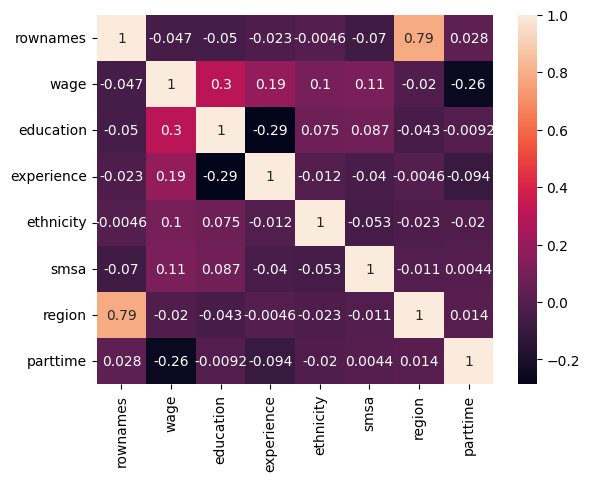

In [15]:
data=a.select_dtypes(include=np.number).corr()
sns.heatmap(data, annot=True)

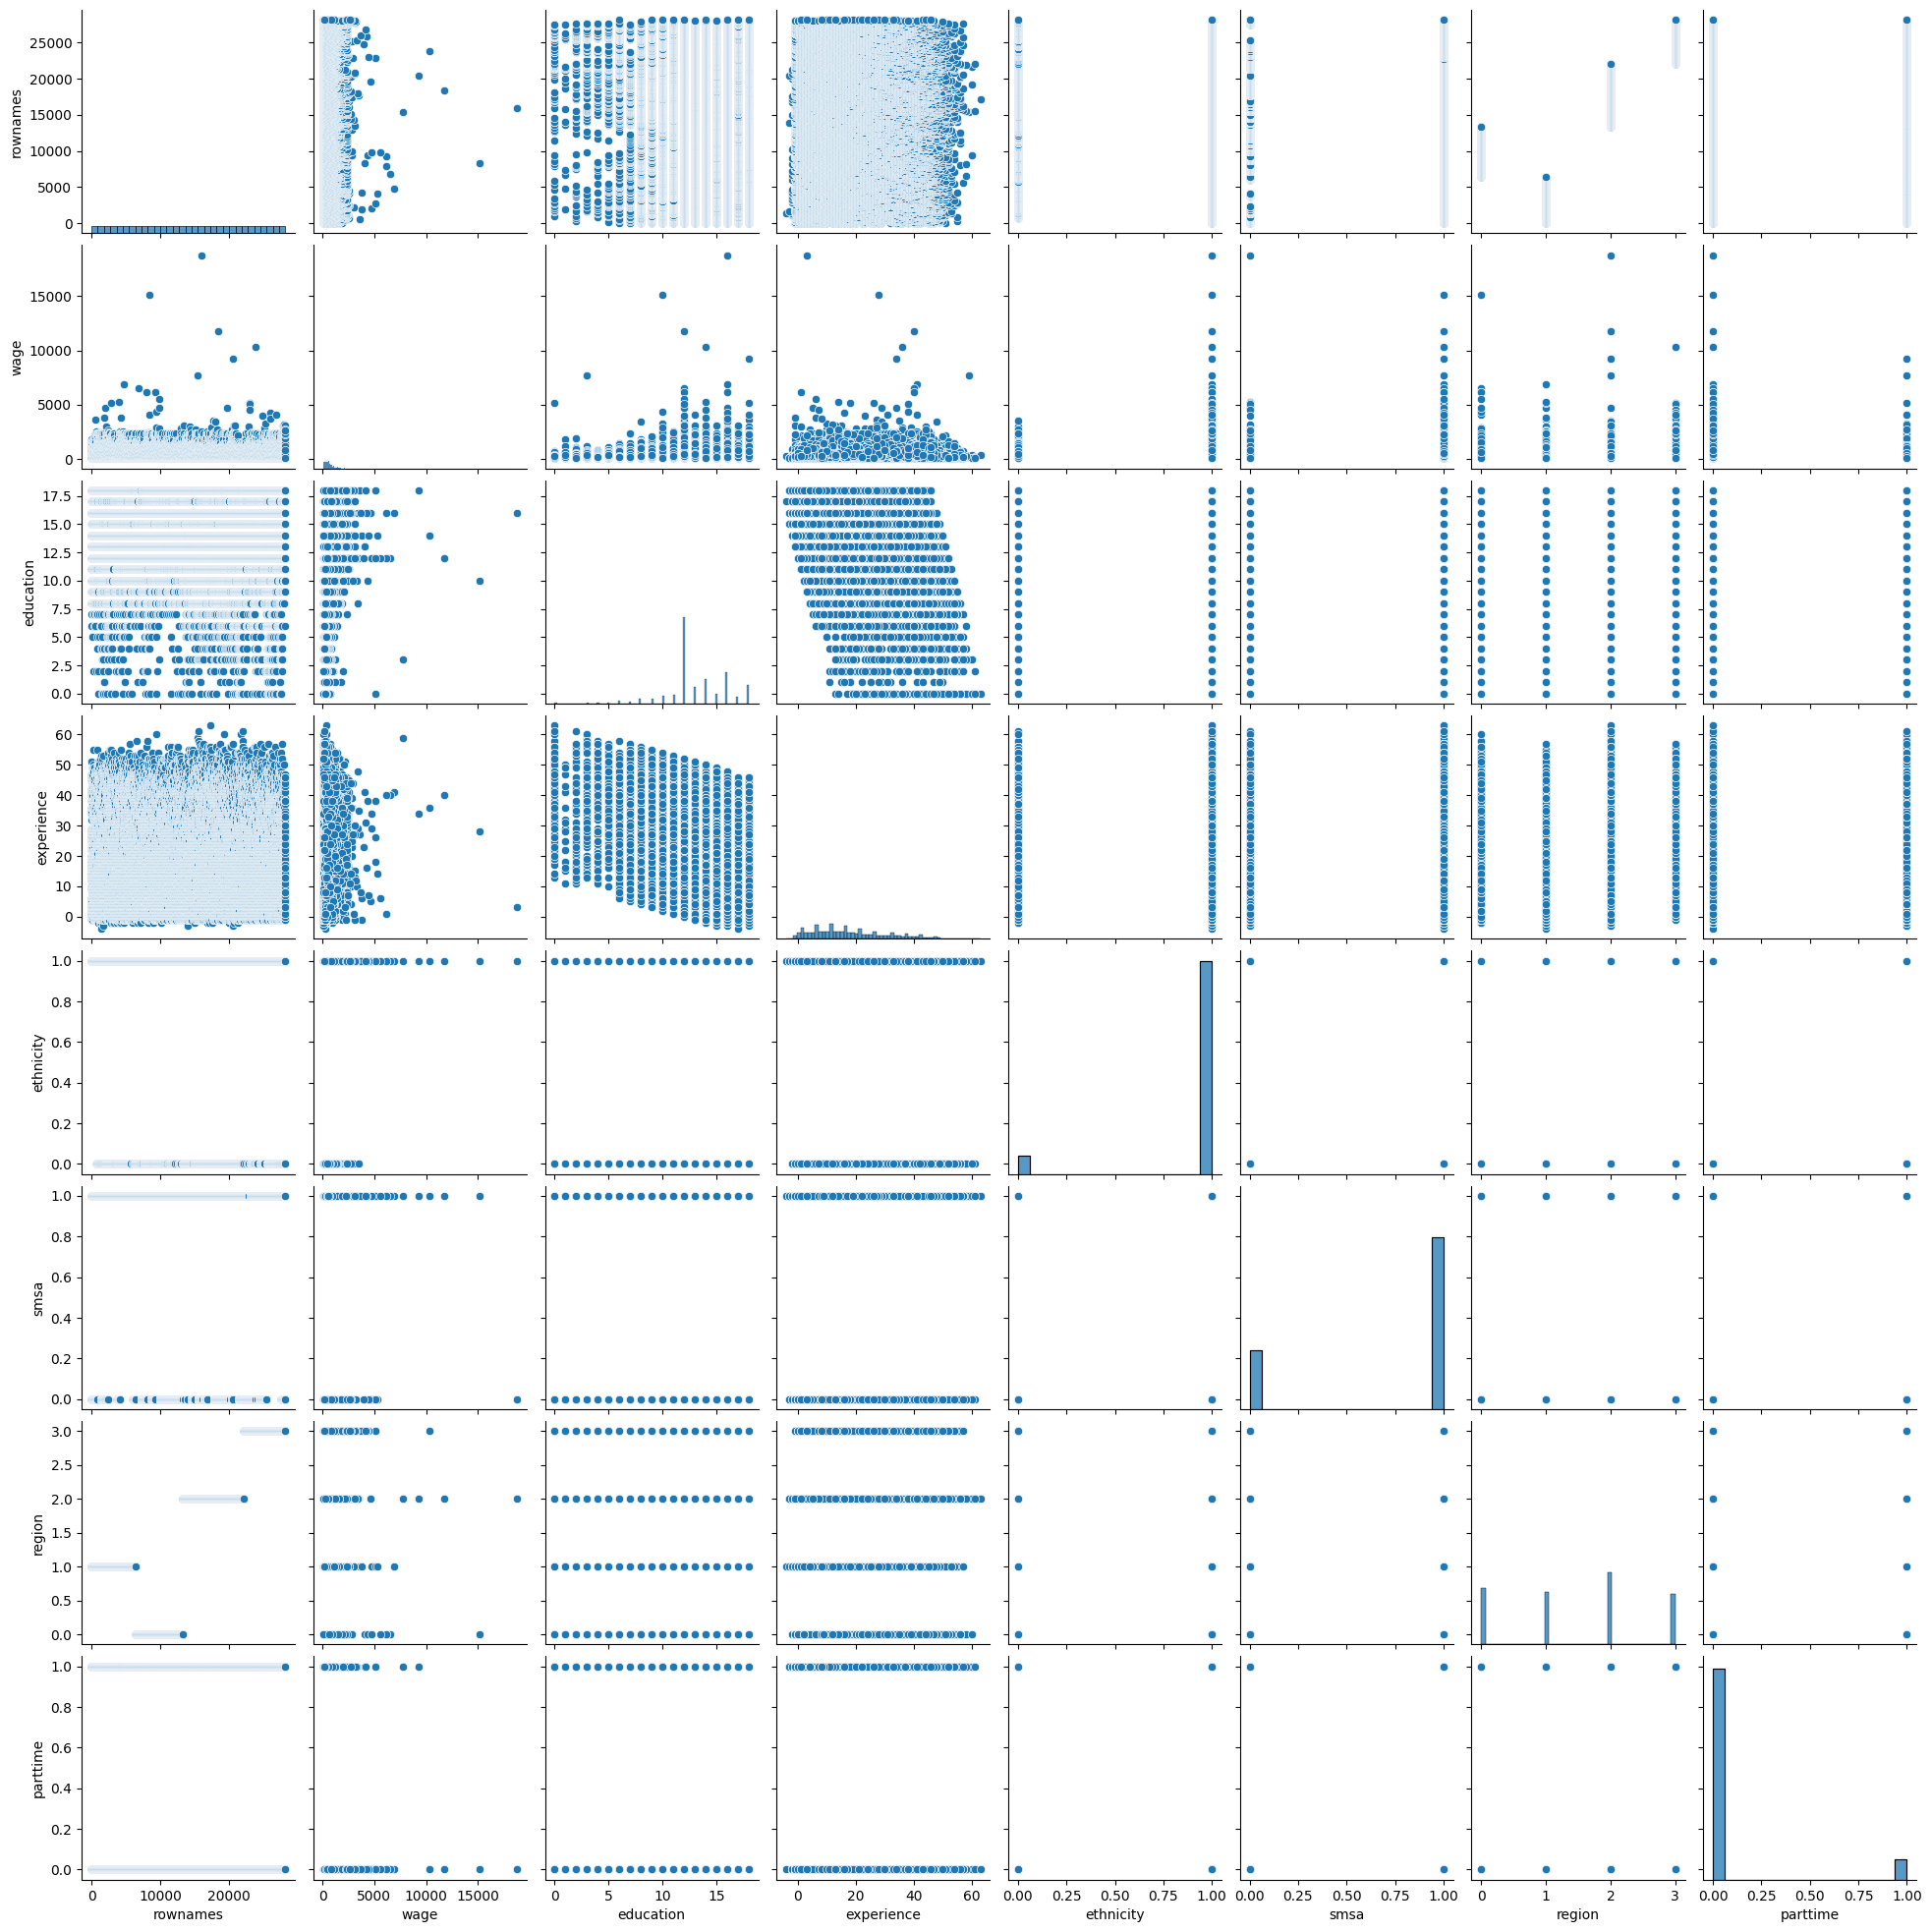

In [16]:
sns.pairplot(data=a)

In [17]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

       rownames    wage  education  experience  ethnicity  smsa  region
0             1  354.94          7          45          1     1       1
1             2  123.46         12           1          1     1       1
2             3  370.37          9           9          1     1       1
3             4  754.94         11          46          1     1       1
4             5  593.54         12          36          1     1       1
...         ...     ...        ...         ...        ...   ...     ...
28150     28151  356.13         12          13          1     0       3
28151     28152  308.64         12           8          1     0       3
28152     28153  427.35         12          28          1     0       3
28153     28154  834.02         17          30          1     0       3
28154     28155  123.08         10          26          1     0       3

[28155 rows x 7 columns]


In [18]:
print(y)

0        0
1        1
2        0
3        0
4        0
        ..
28150    0
28151    1
28152    0
28153    0
28154    1
Name: parttime, Length: 28155, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
print(x_train)

       rownames     wage  education  experience  ethnicity  smsa  region
17483     17484   339.51         11           7          1     1       2
14131     14132   164.61          8           4          0     1       2
26163     26164   356.13         16           3          1     1       3
8603       8604   522.32          6          22          1     1       0
10431     10432   391.74         12           5          1     1       0
...         ...      ...        ...         ...        ...   ...     ...
16897     16898  2283.95         12          30          1     1       2
3032       3033   257.20         12           6          0     1       1
11278     11279   403.61         12          20          1     0       0
25503     25504  1780.63         18          17          1     1       3
12162     12163    85.19         11           1          1     0       0

[22524 rows x 7 columns]


In [21]:
print(y_train)

17483    0
14131    0
26163    0
8603     0
10431    0
        ..
16897    0
3032     0
11278    0
25503    0
12162    1
Name: parttime, Length: 22524, dtype: int64


In [22]:
print(x_test)

       rownames     wage  education  experience  ethnicity  smsa  region
13592     13593   735.99         16          38          1     0       2
2982       2983   878.44         12          15          1     1       1
5439       5440   474.83         12          24          1     1       1
26641     26642   569.80         14           8          1     1       3
1555       1556   688.51          8          26          1     1       1
...         ...      ...        ...         ...        ...   ...     ...
25311     25312   469.90         17           5          1     1       3
21699     21700   108.14         10           8          1     1       2
3197       3198  1424.50         16          14          1     1       1
8698       8699  1157.41         12          12          1     1       0
16485     16486   352.73         12           1          1     0       2

[5631 rows x 7 columns]


In [23]:
print(y_test)

13592    0
2982     0
5439     0
26641    0
1555     0
        ..
25311    0
21699    0
3197     0
8698     0
16485    0
Name: parttime, Length: 5631, dtype: int64


In [24]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
print(ypred)

[0 0 0 ... 0 0 0]


In [28]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.9016160539868585


In [29]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[4882  268]
 [ 286  195]]


In [32]:
print(model.predict([[13593,735.99,16,38,1,0,2]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [33]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [27]:
print(ypred)

[1. 0. 0. ... 0. 0. 0.]


In [36]:
print(model.predict([[13593,735.99,16,38,1,0,2]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [34]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.9010832889362458


In [35]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[4871  279]
 [ 278  203]]


In [38]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [39]:
print(ypred)

[0 0 0 ... 0 0 0]


In [40]:
print(model.predict([[13593,735.99,16,38,1,0,2]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.9328716036228023


In [42]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[5046  104]
 [ 274  207]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      5150
           1       0.67      0.43      0.52       481

    accuracy                           0.93      5631
   macro avg       0.81      0.71      0.74      5631
weighted avg       0.92      0.93      0.93      5631

